In [97]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import joblib

In [98]:
# Define the features and lag
features = [
    "temp2_max(c)", "temp2_min(c)", "temp2_ave(c)", 
    "suface_pressure(pa)", "wind_speed50_max(m/s)", "wind_speed50_min(m/s)", 
    "wind_speed50_ave(m/s)", "prectotcorr", "total_demand(mw)"
]
lag = 1

# Load the test data
test_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\test_data.csv", index_col="date", parse_dates=True)

In [99]:
# Directory containing pre-fitted scalers
scalers_dir = r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Notebooks\scalers"

# Dictionary to store predictions and RMSE for each feature
results = {}

model_dir = r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Notebooks\models"

# Loop through each feature
for feature in features:
    print(f"Processing feature: {feature}")
    
    # Load the saved model
    model_path = os.path.join(model_dir, f"{feature.replace('/', '')}_LSTM.h5")
    model = load_model(model_path, custom_objects={'mse': mean_squared_error})
    
    # Load the pre-fitted scaler for the current feature
    scaler_path = os.path.join(scalers_dir, f"{feature.replace('/', '')}_scaler.pkl")
    with open(scaler_path, 'rb') as f:
        feature_scaler = joblib.load(f)
    
    # Scale the test data for the current feature using the pre-fitted scaler
    scaled_test_data = feature_scaler.transform(test_data[[feature]].values)
    
    # Create lagged features
    X_test, y_test = [], []
    for i in range(lag, len(scaled_test_data)):
        X_test.append(scaled_test_data[i-lag:i, 0])
        y_test.append(scaled_test_data[i, 0])
    X_test = np.array(X_test).reshape((len(X_test), lag, 1))
    y_test = np.array(y_test).reshape(-1, 1)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = feature_scaler.inverse_transform(predictions)
    y_test = feature_scaler.inverse_transform(y_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data[[feature]].iloc[lag:-1], predictions[1:]))
    results[feature] = {"predictions": predictions, "rmse": rmse}
    print(f"Feature: {feature}, RMSE: {rmse}")

Processing feature: temp2_max(c)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: temp2_max(c), RMSE: 0.33251908312079753
Processing feature: temp2_min(c)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: temp2_min(c), RMSE: 0.32976920439750645
Processing feature: temp2_ave(c)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: temp2_ave(c), RMSE: 0.2669109463659849
Processing feature: suface_pressure(pa)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: suface_pressure(pa), RMSE: 0.03510101104638947
Processing feature: wind_speed50_max(m/s)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: wind_speed50_max(m/s), RMSE: 0.6791575547252612
Processing feature: wind_speed50_min(m/s)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: wind_speed50_min(m/s), RMSE: 0.5875198360909127
Processing feature: wind_speed50_ave(m/s)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Feature: wind_speed50_ave(m/s), RMSE: 0.5171609312764547
Processing feature: prectotcorr
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


Feature: prectotcorr, RMSE: 6.6800744017152365
Processing feature: total_demand(mw)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Feature: total_demand(mw), RMSE: 129.02253467175802


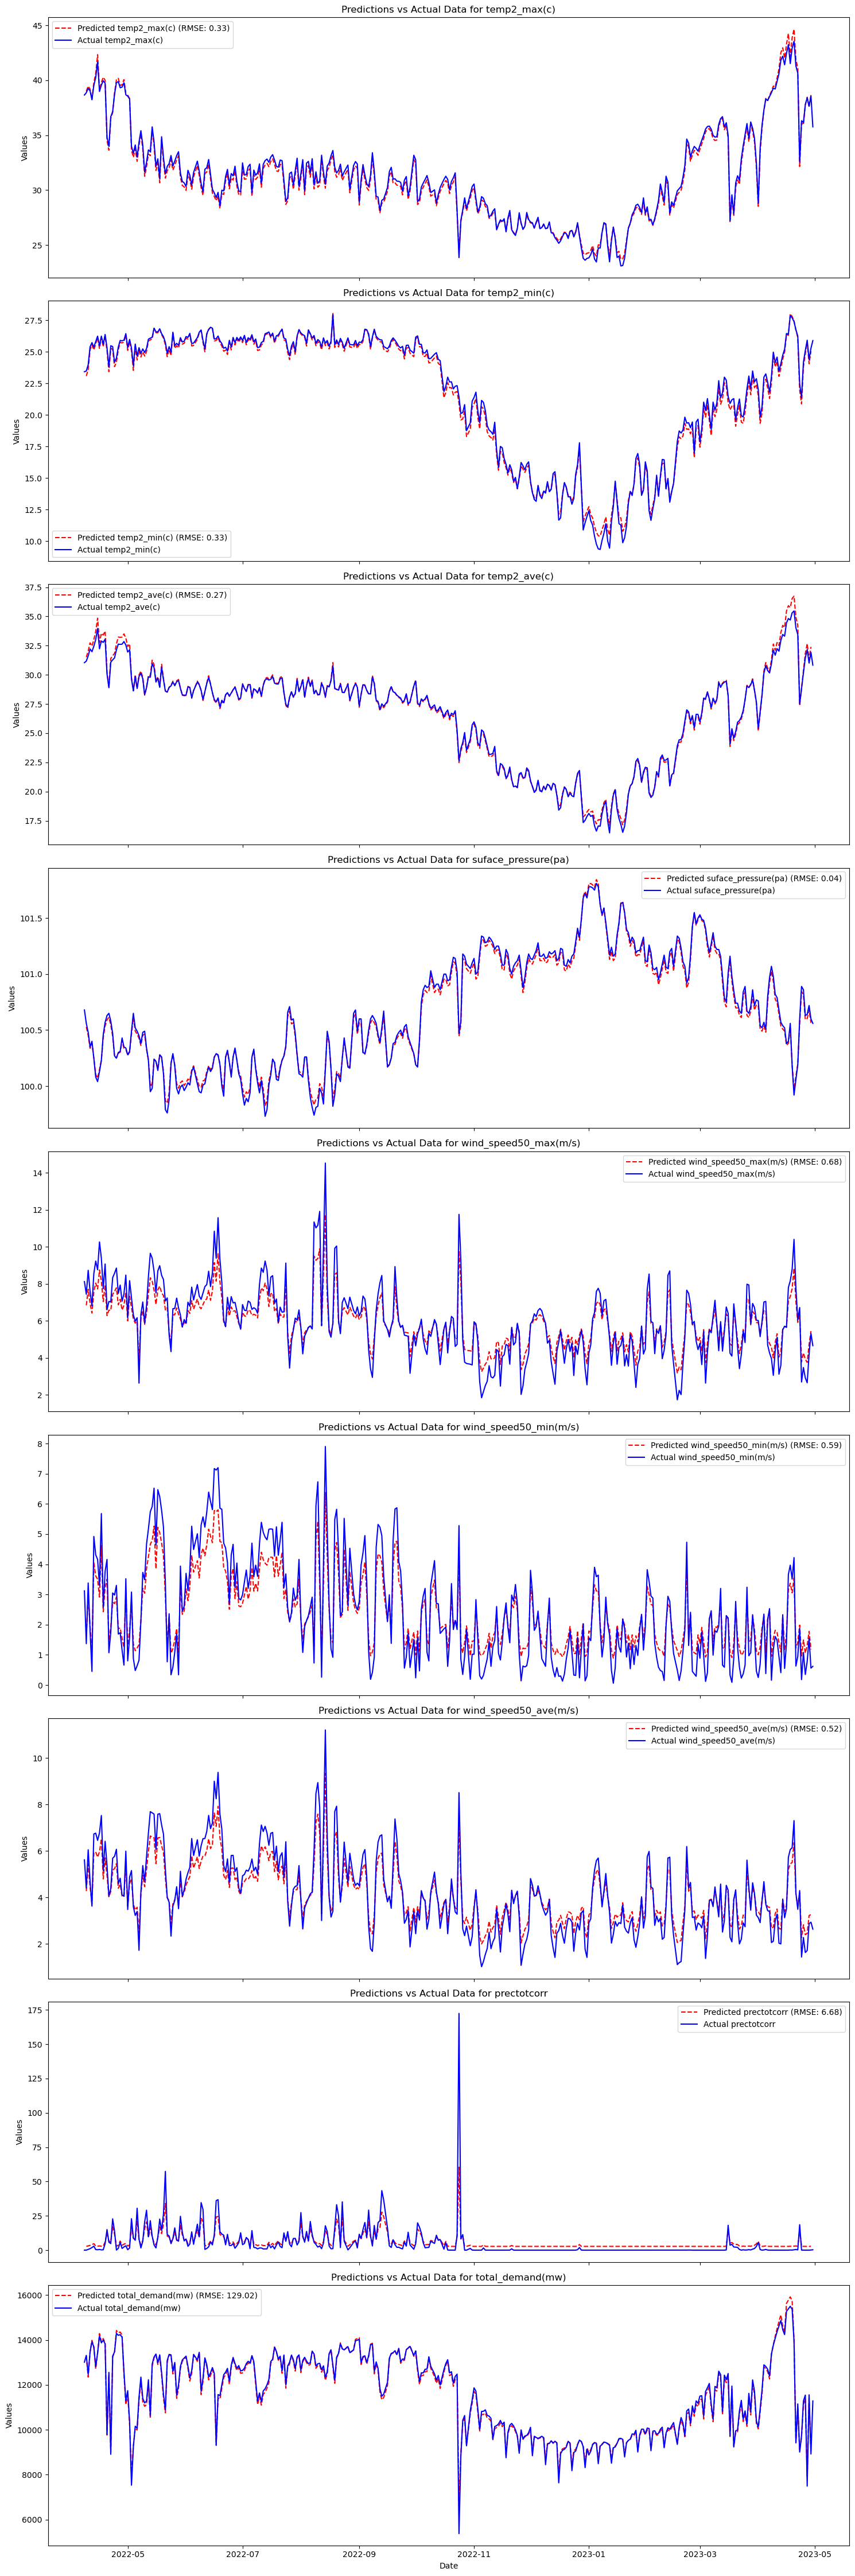

In [100]:
# Plot the predictions for each feature in subplots
fig, axes = plt.subplots(len(features), 1, figsize=(15, 5 * len(features)), sharex=True)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.plot(test_data.index[lag:-1], results[feature]["predictions"][1:], label=f"Predicted {feature} (RMSE: {results[feature]['rmse']:.2f})", color='red', linestyle='--')
    ax.plot(test_data.index, test_data[feature], label=f"Actual {feature}", color='blue')
    ax.set_title(f"Predictions vs Actual Data for {feature}")
    ax.set_ylabel("Values")
    ax.legend()

plt.xlabel("Date")
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


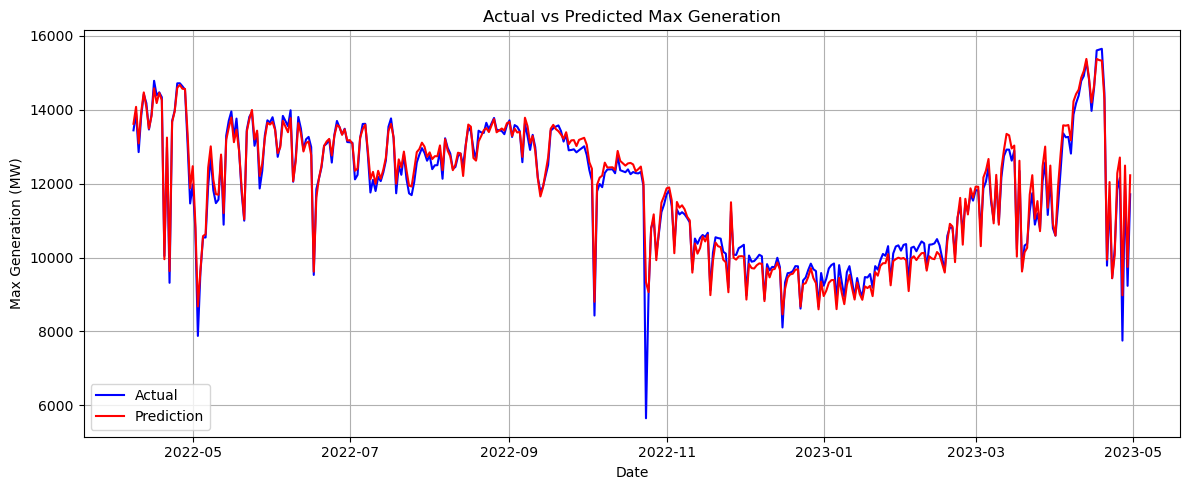

In [101]:
# Load the saved model
model = load_model(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Notebooks\models\final_model 291.19.h5", custom_objects={'mse': mean_squared_error})

# Load the data
data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\data.csv", index_col="date", parse_dates=True)
test_data = pd.read_csv(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Data\test_data.csv", index_col="date", parse_dates=True)

# Prepare the test data
y_test = test_data["max_generation(mw)"]
X_test = test_data.drop(columns=["total_demand(mw)"])

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit the scalers on the training data (you need to ensure the same scaling as the original notebook)
scaler_X=joblib.load("X_train_scaler.pkl")
scaler_y=joblib.load("y_train_scaler.pkl")

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape X_test_scaled to match the expected input shape
n_input = 1  # Same as defined in the original notebook
n_features = X_test.shape[1]
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], n_input, n_features))

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test_scaled_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data["max_generation(mw)"], label="Actual", color="blue")
plt.plot(test_data.index, y_pred, label="Prediction", color="red")
plt.xlabel("Date")
plt.ylabel("Max Generation (MW)")
plt.title("Actual vs Predicted Max Generation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# Create a DataFrame for predictions
pred_data = pd.DataFrame(index=test_data.index[lag:])  # Adjust index to match the length of predictions

# Add predictions for each feature to the DataFrame
for feature in features:
    pred_data[feature] = results[feature]["predictions"].flatten()

pred_data.head()

,temp2_max(c),temp2_min(c),temp2_ave(c),suface_pressure(pa),wind_speed50_max(m/s),wind_speed50_min(m/s),wind_speed50_ave(m/s),prectotcorr,total_demand(mw)
date,,,,,,,,,
2022-04-09,38.761169,23.010769,31.356621,100.640717,7.292943,2.790229,5.131064,2.737261,12938.300781
2022-04-10,39.003368,23.075054,31.513823,100.527786,6.838968,1.667873,4.272655,2.764670,13277.064453
2022-04-11,39.467400,23.603369,32.035118,100.454086,7.703329,2.965704,5.443769,3.092927,12343.732422
2022-04-12,39.200153,25.167482,32.739567,100.337029,6.938788,1.934212,4.475498,3.481174,13459.195312
2022-04-13,38.268311,25.549232,32.460331,100.381660,6.421729,1.118480,3.737011,4.023230,13982.344727


In [103]:
# # Load the saved model
# model = load_model(r"C:\Users\Idea\Documents\Programming languages\Python\Notebooks\Time Series\Project_1\Notebooks\models\final_model 291.19.h5", custom_objects={'mse': mean_squared_error})

# # Prepare the test data
# X_test = pred_data.drop(columns=["total_demand(mw)"])

# # Scale the data
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()

# # Fit the scalers on the training data (you need to ensure the same scaling as the original notebook)
# scaler_X=joblib.load("X_train_scaler.pkl")
# scaler_y=joblib.load("y_train_scaler.pkl")

# X_test_scaled = scaler_X.transform(X_test)
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# # Reshape X_test_scaled to match the expected input shape
# n_input = 1  # Same as defined in the original notebook
# n_features = X_test.shape[1]
# X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], n_input, n_features))

# # Predict and inverse transform the predictions
# y_pred_scaled = model.predict(X_test_scaled_reshaped)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# # Plot the results
# plt.figure(figsize=(12, 5))
# plt.plot(test_data.index, test_data["max_generation(mw)"], label="Actual", color="blue")
# plt.plot(test_data.index, y_pred, label="Prediction", color="red")
# plt.xlabel("Date")
# plt.ylabel("Max Generation (MW)")
# plt.title("Actual vs Predicted Max Generation")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [104]:
# Générer un vecteur booléen où la condition est vérifiée
JoursAssurés = (test_data["max_generation(mw)"].values[1:] - test_data["total_demand(mw)"].values[:-1]) > 1
len(JoursAssurés)

378

In [105]:
# Transform y_pred from shape (379, 1) to (379,)
y_pred = y_pred.reshape(-1)

In [106]:
JoursAssurésPredit = (y_pred[1:] - pred_data["total_demand(mw)"].values) > 1
len(JoursAssurésPredit)

378

In [107]:
import numpy as np

# Comparer les deux vecteurs
comparison = np.array(JoursAssurés) == np.array(JoursAssurésPredit)

# Calculer le pourcentage d'éléments égaux
accuracy = np.sum(comparison) / len(JoursAssurés) * 100

print(f"La précision est de : {accuracy:.2f} %")

La précision est de : 91.27 %


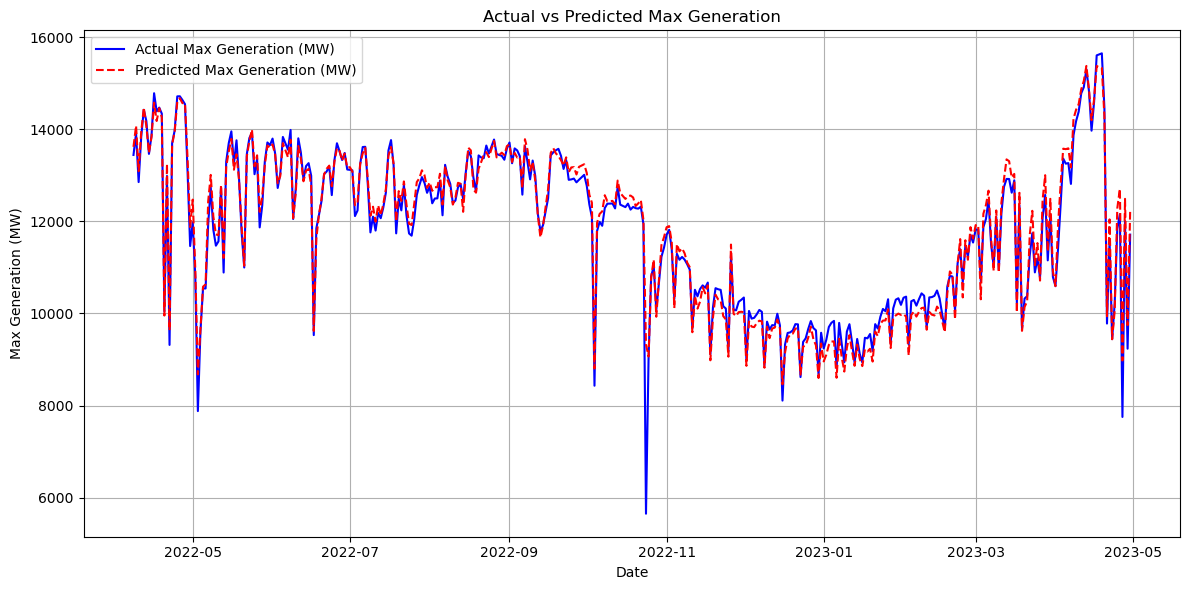

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data["max_generation(mw)"], label="Actual Max Generation (MW)", color="blue")
plt.plot(test_data.index, y_pred, label="Predicted Max Generation (MW)", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Max Generation (MW)")
plt.title("Actual vs Predicted Max Generation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

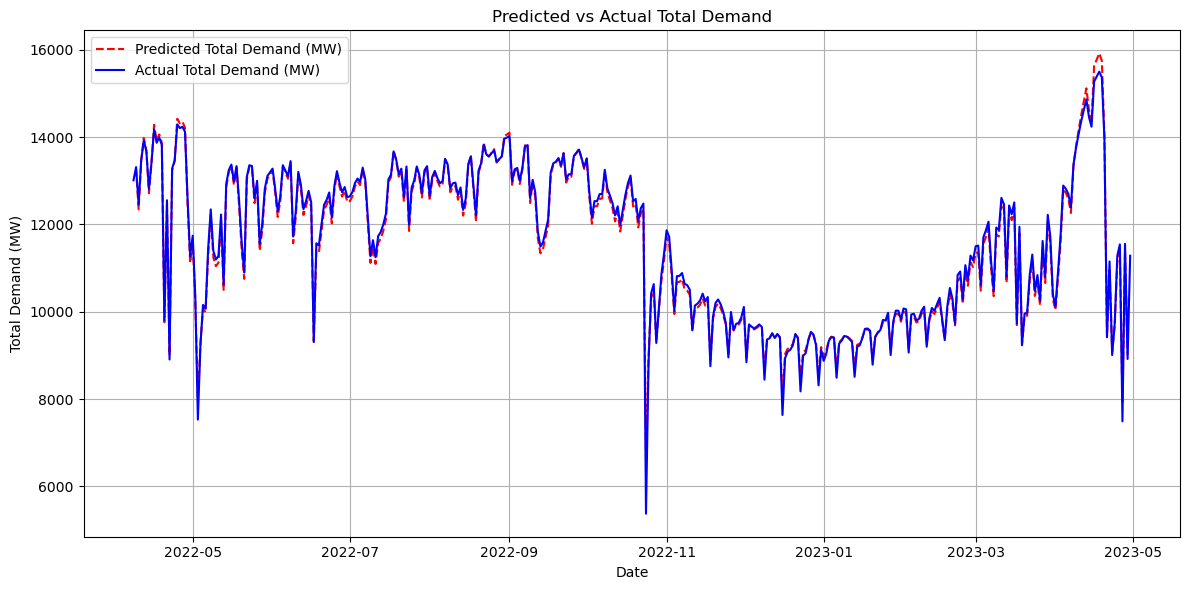

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(pred_data.index[:-1], pred_data["total_demand(mw)"][1:], label="Predicted Total Demand (MW)", color="red", linestyle="--")
plt.plot(test_data.index, test_data["total_demand(mw)"], label="Actual Total Demand (MW)", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Demand (MW)")
plt.title("Predicted vs Actual Total Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()